In [78]:
#Import Dataset
#==============================================
import pandas as pd
URL = "../data/processed/healthcare-dataset-stroke-data-T.csv"
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,1,1,1,228.69,36.6,2,1
1,2,31112,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,4,1665,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,5,56669,1,81.0,0,0,1,1,1,186.21,29.0,2,1


In [79]:
# Split the data into features (X) and labels (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

In [81]:
# Model initiation
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric= 'euclidean')

In [82]:
# Initialize a StratifiedKFold object
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [83]:
# Initialize lists to store the evaluation metrics
accuracies = []
precisions = []
recalls = []
f1s = []

In [84]:
# Loop through the folds in the StratifiedKFold object
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the KNN Classifier on the training data
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(X_train, y_train)

    # Predict the labels on the test data
    y_pred = knn_clf.predict(X_test)

    # Evaluate the performance of the KNN Classifier on the test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the evaluation metrics to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

In [85]:
# Compute the average of the evaluation metrics across all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1s) / len(f1s)

In [86]:
# Print the metrics as percentages
print(f'Accuracy: {avg_accuracy * 100:.2f}%')
print(f'Precision: {avg_precision * 100:.2f}%')
print(f'Recall: {avg_recall * 100:.2f}%')
print(f'F1 Score: {avg_f1 * 100:.2f}%')

Accuracy: 96.72%
Precision: 71.09%
Recall: 39.69%
F1 Score: 50.38%


In [87]:
# Create a scatter plot of the test data, using different colors for positive and negative heart strikes
positive_samples = X_test[y_test == 1]
negative_samples = X_test[y_test == 0]

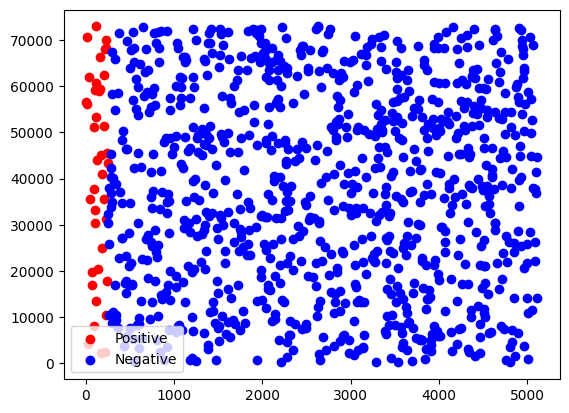

In [88]:
import matplotlib.pyplot as plt
plt.scatter(positive_samples.iloc[:, 0], positive_samples.iloc[:, 1], c='red', label='Positive')
plt.scatter(negative_samples.iloc[:, 0], negative_samples.iloc[:, 1], c='blue', label='Negative')
plt.legend()
plt.show()

In [89]:
import pickle
# Dump the trained decision tree classifier with Pickle
Knn_pkl_filename = '../models/decision_tree_classifier.pkl'
# Open the file to save as pkl file
with open(Knn_pkl_filename,"wb") as f:
    pickle.dump(knn_clf,f)

#  Using Optuna

In [63]:
# Define the objective function to optimize with Optuna
import numpy as np
import optuna
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
    
    # Use StratifiedKFold to get the cross-validation scores
    skf = StratifiedKFold(n_splits=5,shuffle=True ,random_state=0)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the KNN classifier with the current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
        knn.fit(X_train, y_train)
        
        # Predict the labels on the test data
        y_pred = knn.predict(X_test)
        
        # Calculate the accuracy score
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        
        
    # Return the mean accuracy score over all folds
    return np.mean(scores)

In [64]:
# Create an Optuna study to search for the best hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2023-02-11 10:42:36,891] A new study created in memory with name: no-name-92141e55-d78b-4916-ba6e-3e71fedc8dc0
[I 2023-02-11 10:42:36,948] Trial 0 finished with value: 0.9663814097174213 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9663814097174213.
[I 2023-02-11 10:42:37,007] Trial 1 finished with value: 0.9737158766045703 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.9663814097174213.
[I 2023-02-11 10:42:37,194] Trial 2 finished with value: 0.9576202428628668 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 2 with value: 0.9576202428628668.
[I 2023-02-11 10:42:37,256] Trial 3 finished with value: 0.9669930305125283 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 2 with value: 0.9576202428628668.
[I 2023-02-11 10:42:37,390] Trial 4 finished with value: 0.9

In [91]:
# Print the best hyperparameters found
print("Best hyperparameters: ", study.best_params)

Best hyperparameters:  {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'euclidean'}


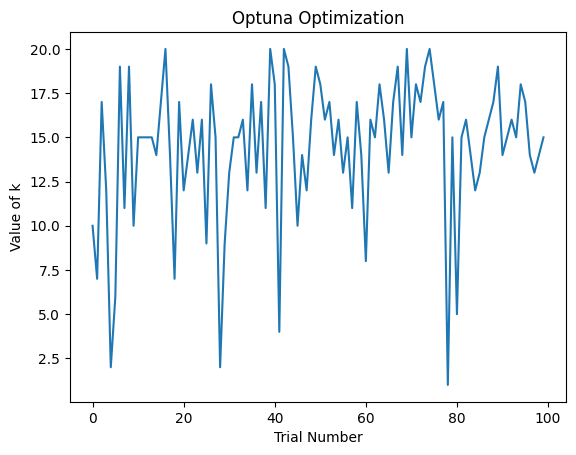

In [92]:
# Plot the number of trials against the value of k
plt.plot(trials_dataframe["number"], trials_dataframe["params_n_neighbors"])
plt.xlabel("Trial Number")
plt.ylabel("Value of k")
plt.title("Optuna Optimization")
plt.show()